In [2]:
#1. Katherine Barragan
#2. NCAR Research Data Archive: ERA Interim
#3. Spatial and Temporal resolution: 0.75°x0.75°/ daily data taken at 1200 UTC 
#   Northern Hemisphere Latitude 0-90 Longitude (-180)- (180) 
#4. Latitude, Longitude, Time and daily mean Geopotential Height at 500mb(z500)
#5. Jan 1, 1979 (1979-01-01) - Aug 31, 2019(2019-08-31) - daily

#This dataset is looking at geopotential height of 500mb 
#File on "home" is called 'geop' and 
#"/scratch/kbarrag/clim680_dataset/mean/erai.z500.day.mean.1979-2019.nc"


#Goal of this assignment is get the month Jan 1985 to compare to study 


In [3]:
pip install cftime cfgrib netcdf4 pydap ecmwflibs

Note: you may need to restart the kernel to use updated packages.


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

file = "/scratch/kbarrag/clim680_dataset/mean/erai.z500.day.mean.1979-2019.nc"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (lon: 512, lat: 128, time: 14853)
Coordinates:
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 0.351 1.053 1.754 2.456 ... 87.37 88.07 88.77 89.46
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-08-31
Data variables:
    z500     (time, lat, lon) float32 ...

In [2]:
#trying to recreate a map seen in a paper for cold air outbreaks- (Colucci 1996)
#Part a of Assignment1

ds_year1985 = ds.sel(time=slice('1985-01-18','1985-01-18'))
ds_year1985

#Lets cut the lon and lat to the area we wanna see: North America instead of the whole hemisphere
ds_year1985_NA = ds_year1985.sel(lon=slice(360-180,360-90))
ds_year1985_NA


#this allowed the time "day" to be averaged so that it can turn into a single varible
ds_mean=ds_year1985_NA.mean(dim='time')
ds_mean


<xarray.Dataset>
Dimensions:  (lon: 129, lat: 128)
Coordinates:
  * lon      (lon) float64 180.0 180.7 181.4 182.1 ... 267.9 268.6 269.3 270.0
  * lat      (lat) float64 0.351 1.053 1.754 2.456 ... 87.37 88.07 88.77 89.46
Data variables:
    z500     (lat, lon) float32 5.735e+04 5.734e+04 ... 5.339e+04 5.339e+04

''

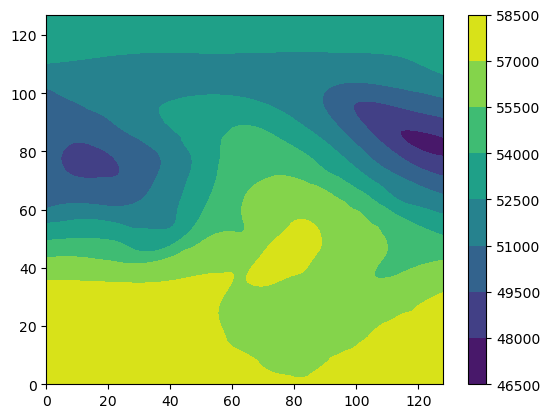

In [4]:
plt.contourf(ds_mean['z500'])
plt.colorbar() 
;

In [5]:
#Part of b of Assignment 1
#this sliced the data by the selected year and lat and lon :|

ds_year1985 = ds.sel(time=slice('1985-01-18','1985-01-18'))

ds_year1985= ds_year1985.squeeze("time")


ds_year1985_NA = ds_year1985.sel(lon=slice(360-180,360-0))
ds_year1985_NA




<xarray.Dataset>
Dimensions:  (lon: 256, lat: 128)
Coordinates:
  * lon      (lon) float64 180.0 180.7 181.4 182.1 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 0.351 1.053 1.754 2.456 ... 87.37 88.07 88.77 89.46
    time     datetime64[ns] 1985-01-18
Data variables:
    z500     (lat, lon) float32 ...

In [ ]:
# contour plot, <matplotlib.....>

min_z500= ds_year1985_NA['z500'].min()
max_z500= ds_year1985_NA['z500'].max()


fig = plt.figure(figsize=(11,8.5))
levels = np.arange(min_z500,max_z500,600)

# Set the axes using the specified map projection
ax = plt.axes(projection=ccrs.PlateCarree())



# Make a filled contour plot
CS= ax.contour(ds_year1985_NA['lon'], 
               ds_year1985_NA['lat'], 
               ds_year1985_NA['z500'],
               levels=levels,
               colors= 'black',
               linewidths=.75,
               transform = ccrs.PlateCarree())


CS1=ax.contourf(ds_year1985_NA['lon'], 
               ds_year1985_NA['lat'], 
               ds_year1985_NA['z500'],
               levels=levels,
               cmap= 'coolwarm',
               transform = ccrs.PlateCarree() )
cbar = plt.colorbar(CS1,orientation= 'horizontal', label= "Pressure Values" ) 


# Add coastlines and label the contour lines with the number: 
ax.coastlines()
ax.clabel(CS, CS.levels, inline=True, fontsize=10)

ax.set_xticks(np.arange(-180,181,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(0,90,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 

ax.set_extent([-180, 0, 90, 0], ccrs.PlateCarree())


#cbar = plt.colorbar(CS,orientation='horizontal') 
plt.title('500mb - Jan 18, 1985 0000UTC')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


;